In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!ls data

Detail Change.csv            Detail Incident.csv
Detail Incident Activity.csv Detail Interaction.csv


https://www.win.tue.nl/bpi/2014/quick_reference_bpi_challenge_2014.pincident - документация датасетов 

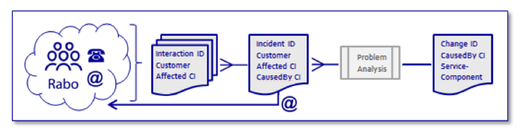

In [135]:
path = "data/"
change = pd.read_csv(path+"Detail Change.csv", 
                     sep=";+", 
                     engine='python')
incident_activity = pd.read_csv(path+"Detail Incident Activity.csv", 
                                sep=";+", 
                                engine='python')
incident = pd.read_csv(path+"Detail Incident.csv", 
                       sep=";+", 
                       engine='python')
interaction = pd.read_csv(path+"Detail Interaction.csv", 
                          sep=";+", 
                          engine='python')

In [5]:
change.columns

Index(['CI Name (aff)', 'CI Type (aff)', 'CI Subtype (aff)',
       'Service Component WBS (aff)', 'Change ID', 'Change Type',
       'Risk Assessment', 'Emergency Change', 'CAB-approval needed',
       'Planned Start', 'Planned End', 'Scheduled Downtime Start',
       'Scheduled Downtime End', 'Actual Start', 'Actual End',
       'Requested End Date', 'Change record Open Time',
       'Change record Close Time', 'Originated from', '# Related Interactions',
       '# Related Incidents'],
      dtype='object')

In [6]:
incident_activity.columns

Index(['Incident ID', 'DateStamp', 'IncidentActivity_Number',
       'IncidentActivity_Type', 'Assignment Group', 'KM number',
       'Interaction ID'],
      dtype='object')

In [7]:
incident.columns

Index(['CI Name (aff)', 'CI Type (aff)', 'CI Subtype (aff)',
       'Service Component WBS (aff)', 'Incident ID', 'Status', 'Impact',
       'Urgency', 'Priority', 'Category', 'KM number', 'Alert Status',
       '# Reassignments', 'Open Time', 'Reopen Time', 'Resolved Time',
       'Close Time', 'Handle Time (Hours)', 'Closure Code',
       '# Related Interactions', 'Related Interaction', '# Related Incidents',
       '# Related Changes', 'Related Change', 'CI Name (CBy)', 'CI Type (CBy)',
       'CI Subtype (CBy)', 'ServiceComp WBS (CBy)', 'Unnamed: 28'],
      dtype='object')

In [8]:
interaction.columns

Index(['CI Name (aff)', 'CI Type (aff)', 'CI Subtype (aff)',
       'Service Comp WBS (aff)', 'Interaction ID', 'Status', 'Impact',
       'Urgency', 'Priority', 'Category', 'KM number',
       'Open Time (First Touch)', 'Close Time', 'Closure Code',
       'First Call Resolution', 'Handle Time (secs)', 'Related Incident'],
      dtype='object')

Выглядит так как-будто, incident джойненная со всеми остальными таблица

In [9]:
len(interaction["CI Name (aff)"].unique())

4153

Предложено три датасета (два из них связанных с инцидентами - это по сути один). Эти датасеты описывают interaction - взаимодействие пользователя с SDA (sevice-desk manager), похожие обращения (interactions) могут быть записаны как один инцидент в датафрейм инциденты, также SDA может сам решить проблему, не создавая инцидент. 

**Interactions**

Чтобы управлять звонками или электронными письмами от клиентов банка Rabobank (коллегам), связанными с нарушением ИКТ-услуг, Агент Службы поддержки (SDA) регистрирует звонки/письма в записи взаимодействия и связывает их с затронутым элементом конфигурации (CI).
SDA может либо непосредственно устранить проблему для клиента (первый звонок), либо создать запись об инциденте, чтобы назначить проблему группе назначения с более глубоким техническим знанием для устранения нарушения сервиса.
Если Службой поддержки получены похожие звонки/письма, SDA может решить связать несколько записей взаимодействия с одной записью об инциденте. Дальнейшее регистрирование действий для устранения нарушения сервиса будет выполняться в записи об инциденте.

In [14]:
# CI - Configuration Item
interaction.head()

,CI Name (aff),CI Type (aff),CI Subtype (aff),Service Comp WBS (aff),Interaction ID,Status,Impact,Urgency,Priority,Category,KM number,Open Time (First Touch),Close Time,Closure Code,First Call Resolution,Handle Time (secs),Related Incident
0,SBA000243,application,Server Based Application,WBS000125,SD0000001,Closed,5,4,4,incident,KM0000987,9-9-2011 9:23,14-2-2014 9:05,Other,N,239,IM0000001
1,SUB000443,subapplication,Web Based Application,WBS000125,SD0000002,Closed,4,4,4,request for information,KM0000989,29-9-2011 14:59,13-12-2013 16:27,Software,N,406,IM0000001
2,LAP000110,computer,Laptop,WBS000187,SD0000003,Closed,4,4,4,incident,KM0000317,13-10-2011 15:47,21-10-2013 5:01,Software,N,738,NaN
3,DTA000110,application,Desktop Application,WBS000256,SD0000004,Closed,4,4,4,incident,KM0000057,1-12-2011 15:39,21-10-2013 5:02,Unknown,N,787,NaN
4,SBA000855,application,Server Based Application,WBS000054,SD0000005,Closed,4,4,4,incident,KM0000652,23-12-2011 16:23,21-10-2013 5:02,Software,N,459,IM0000003


In [17]:
interaction["Status"].unique()

array(['Closed', 'Open - Linked'], dtype=object)

In [24]:
interaction[interaction["Status"] == "Open - Linked"].shape

(6, 17)

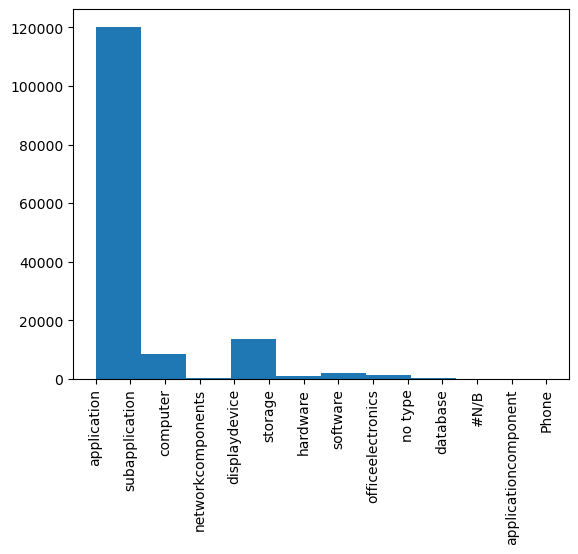

In [23]:
plt.hist(interaction["CI Type (aff)"])
plt.xticks(rotation='vertical')
plt.show()

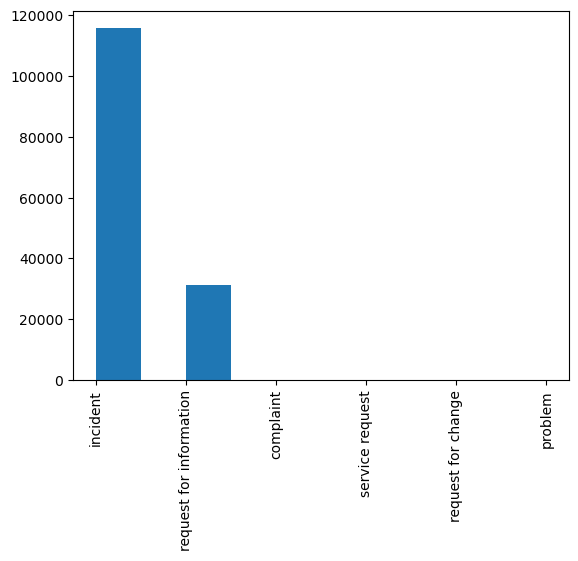

In [61]:
plt.hist(interaction["Category"])
plt.xticks(rotation='vertical')
plt.show()

In [48]:
# конверсия в инциденты
(len(interaction) - interaction["First Call Resolution"].value_counts()["Y"]) / len(interaction) * 100

36.058882751489755

In [59]:
# Среднее время решения проблемы в зависимости от приоритета
interaction["Open Time (First Touch)"] = pd.to_datetime(interaction["Open Time (First Touch)"])
interaction["Close Time"] = pd.to_datetime(interaction["Close Time"])
interaction["total_time"] = interaction["Close Time"] - interaction["Open Time (First Touch)"]
avg_time_by_priority = interaction.groupby('Priority')['total_time'].mean()

In [60]:
avg_time_by_priority

Priority
1             0 days 12:37:00
2   7 days 14:10:36.494192185
3   3 days 05:21:19.336597307
4   2 days 22:03:28.122630071
5   2 days 05:05:07.508480098
Name: total_time, dtype: timedelta64[ns]

In [62]:
solve_time_by_category = interaction.groupby('Category')['total_time'].mean()

In [63]:
solve_time_by_category

Category
complaint                 41 days 20:06:59.047619047
incident                   2 days 17:24:25.348993984
problem                              0 days 00:06:48
request for change                 380 days 00:01:00
request for information    2 days 13:42:04.465894878
service request              64 days 09:25:03.750000
Name: total_time, dtype: timedelta64[ns]

**Incidents**

Инцдиенты приоретизируются по срочности и влиянию, также определяется дедлайн по задаче. Руководитель назначает записи Оператору. Оператор решает проблему за клиента или **перепоручает запись коллеге**, если требуются другие или дополнительные знания. После решения проблемы для клиента Оператор связывает запись инцидента с элементом конфигурации (вызванным CI), который вызвал сбой в обслуживании. После закрытия записи об инциденте клиент получает электронное письмо с сообщением о том, что проблема решена. 

In [128]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer

In [136]:
incident_activity["DateStamp"] = pd.to_datetime(incident_activity["DateStamp"])

In [137]:
event_log = incident_activity.rename(columns={"Incident ID": "case:concept:name",
                                              "DateStamp": "time:timestamp", 
                                              "IncidentActivity_Type": "concept:name", 
                                              "IncidentActivity_Number": "concept:number", 
                                              "Assignment Group": "org:resources"})

In [219]:
net, initial_marking, final_marking = alpha_miner.apply(event_log)

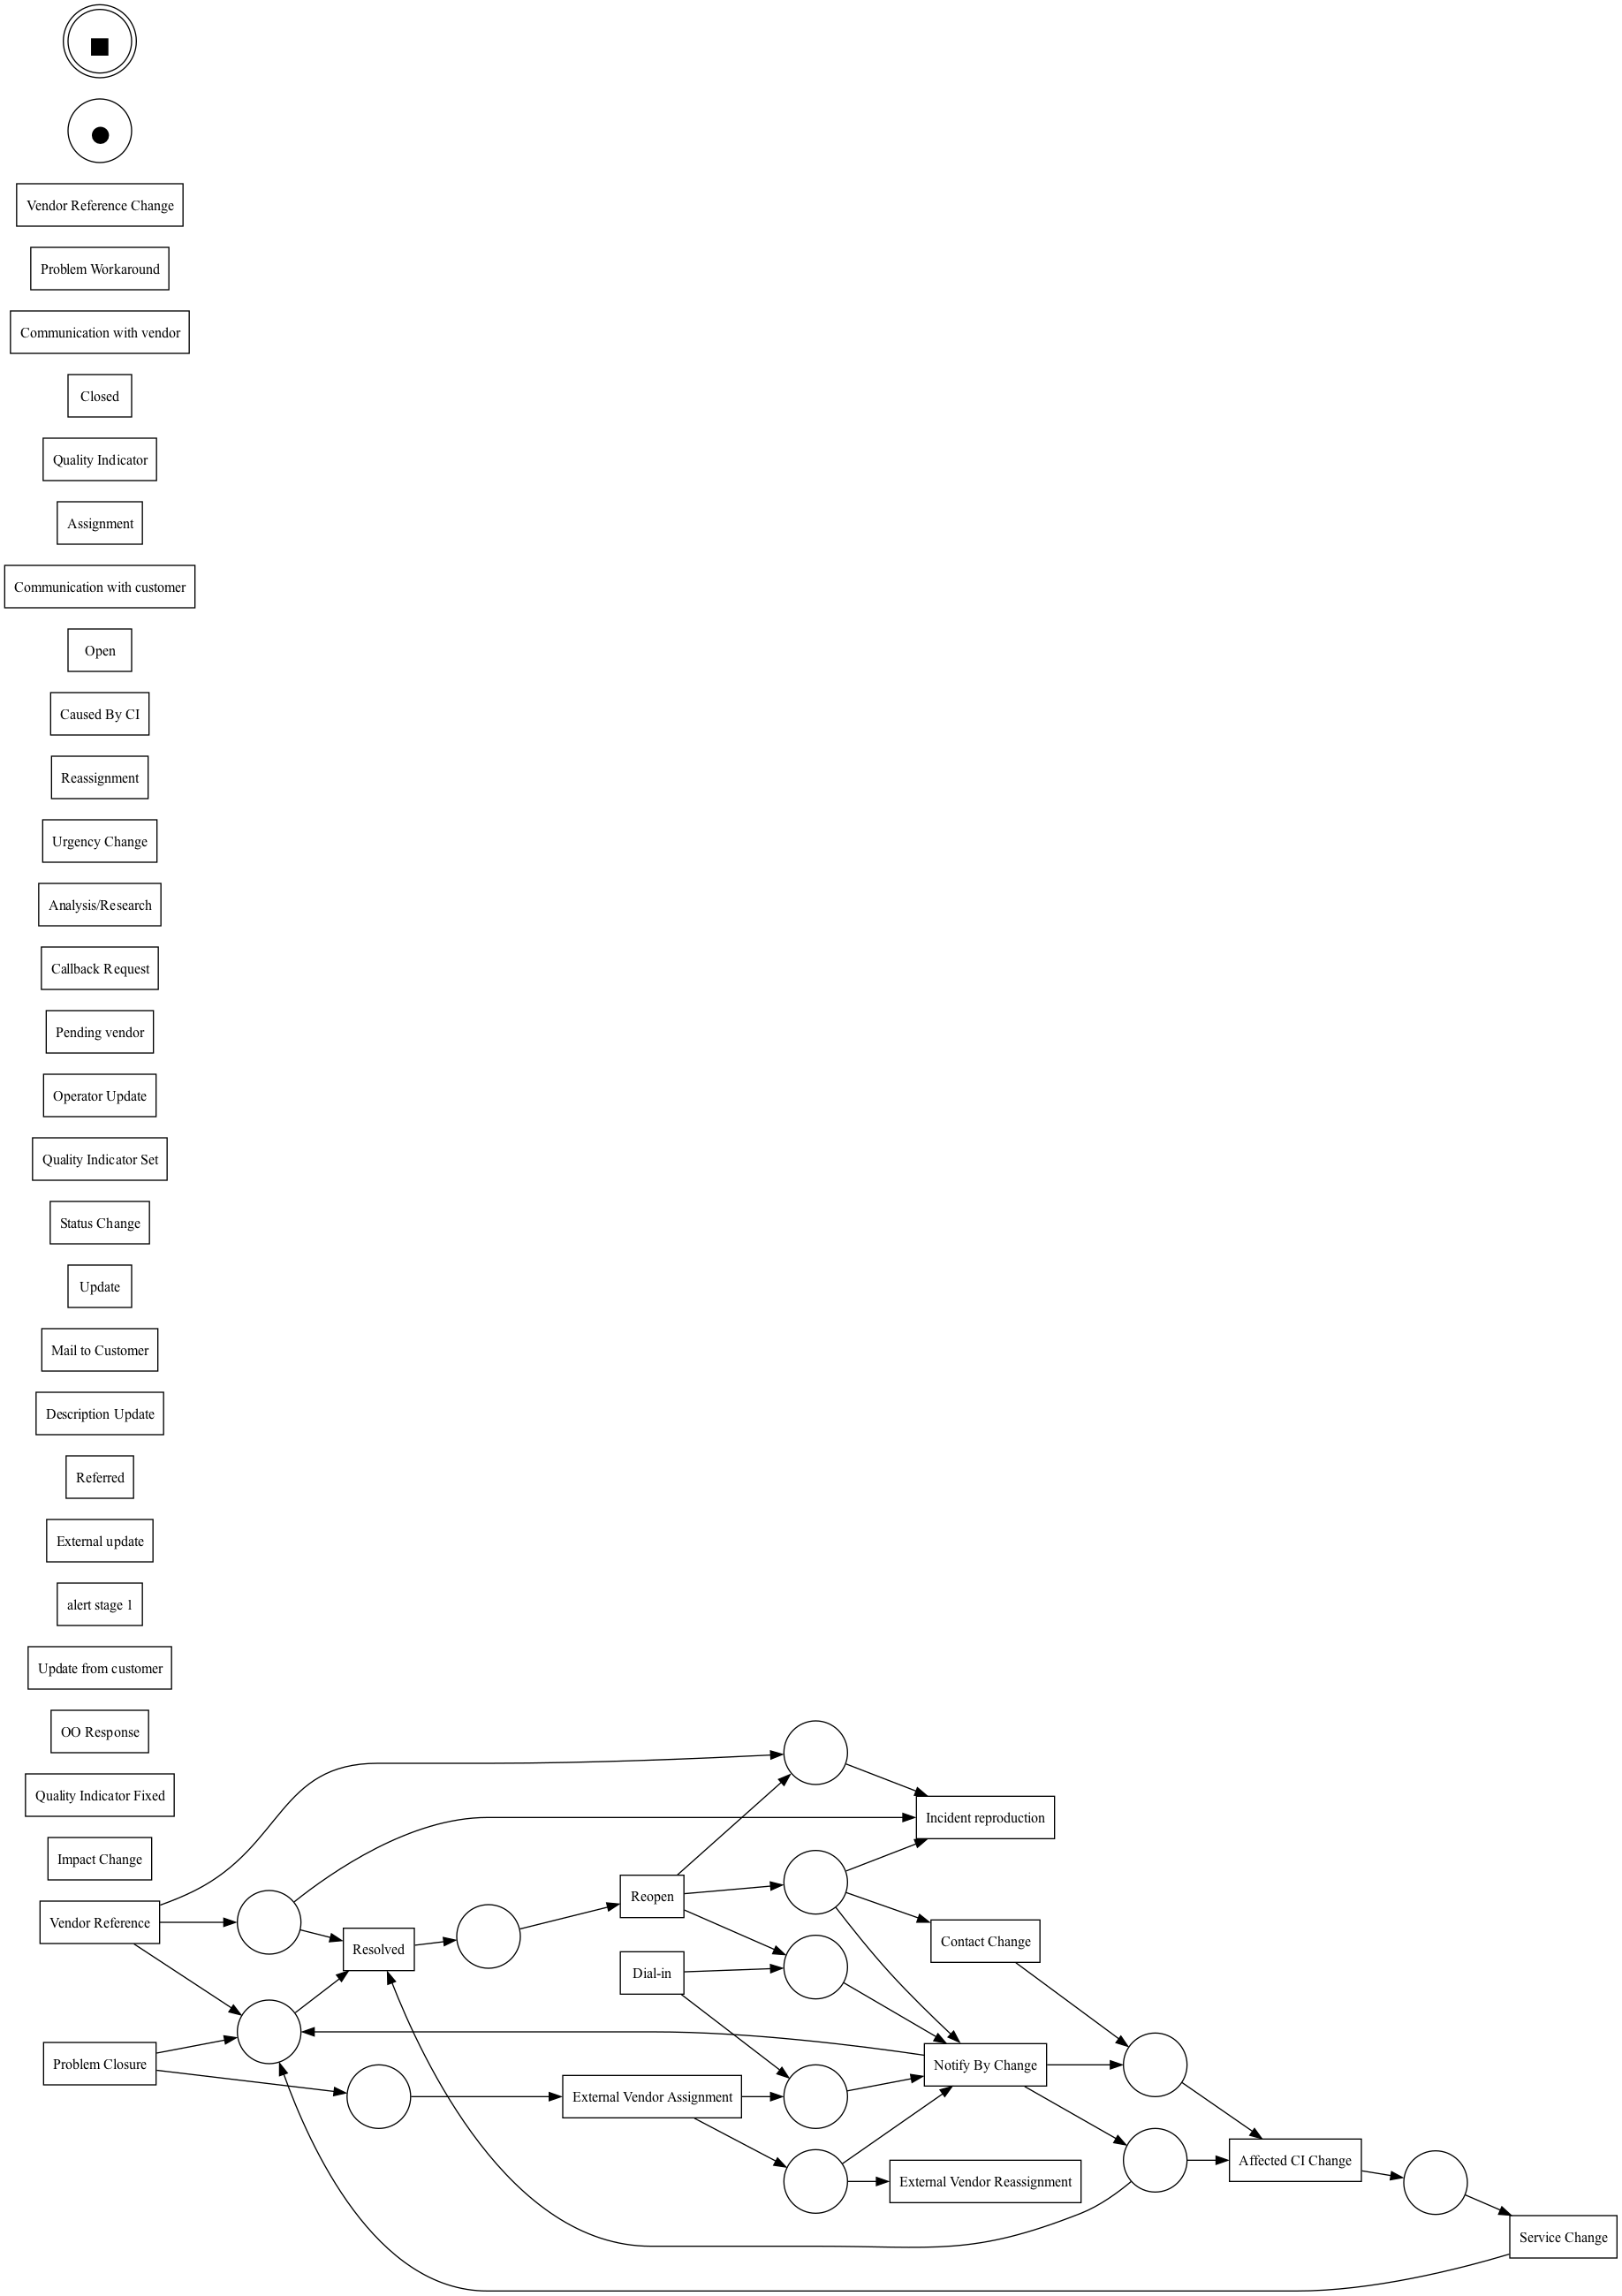

In [139]:
gviz = pn_visualizer.apply(net, initial_marking, final_marking)

pn_visualizer.view(gviz)

In [140]:
# процессы из этих данных также извлечь не получится, либо можно сказать, что процессы в фирме не упорядоченные

In [141]:
total_incidents = len(incident_activity['Incident ID'].unique())
print('Total number of incidents: {}'.format(total_incidents))

Total number of incidents: 46616


IncidentActivity_Type
Affected CI Change                185
Analysis/Research                 981
Assignment                      88502
Callback Request                   53
Caused By CI                    34382
Closed                          50145
Communication with customer      6148
Communication with vendor        1777
Contact Change                     32
Description Update               4501
Dial-in                             2
External Vendor Assignment       4354
External Vendor Reassignment       43
External update                  1099
Impact Change                    1283
Incident reproduction              23
Mail to Customer                 3788
Notify By Change                  281
OO Response                        33
Open                            46607
Operator Update                 56292
Pending vendor                   4338
Problem Closure                    40
Problem Workaround                140
Quality Indicator                2465
Quality Indicator Fixed     

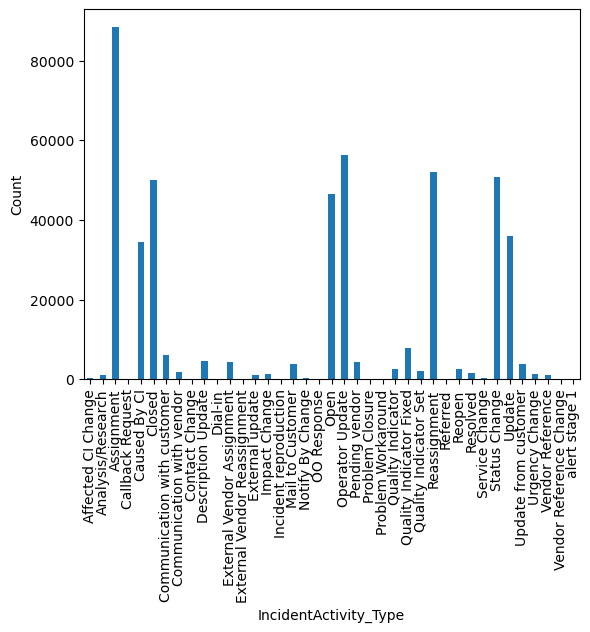

In [142]:
# Количество инцидентов по типу назначения
action_count = incident_activity.groupby('IncidentActivity_Type')['Incident ID'].count()
print(action_count)

action_count.plot(kind='bar', xlabel='IncidentActivity_Type', ylabel='Count')
plt.show()

In [194]:
# Количество инцидентов по группе назначения
group_count = incident_activity.groupby('Assignment Group', as_index=False)['Incident ID'].count()
print(group_count)

    Assignment Group  Incident ID
0           TEAM0001         3777
1           TEAM0002         6694
2           TEAM0003        10047
3           TEAM0004         1002
4           TEAM0005          115
..               ...          ...
237         TEAM0238            1
238         TEAM0239           16
239         TEAM0240            4
240         TEAM0241            7
241         TEAM9999         8309

[242 rows x 2 columns]


In [199]:
group_count[group_count["Incident ID"] == group_count["Incident ID"].max()]["Assignment Group"], group_count["Incident ID"].max()

(7    TEAM0008
 Name: Assignment Group, dtype: object,
 84143)

In [200]:
group_count[group_count["Incident ID"] == group_count["Incident ID"].min()]["Assignment Group"], group_count["Incident ID"].min()

(163    TEAM0164
 167    TEAM0168
 168    TEAM0169
 237    TEAM0238
 Name: Assignment Group, dtype: object,
 1)

In [183]:
# Узнать время выполнения действия
max_ = incident_activity.groupby('Incident ID', as_index=False)["DateStamp"].max()
min_ = incident_activity.groupby('Incident ID', as_index=False)["DateStamp"].min()
max_["Delta"] = max_["DateStamp"] - min_["DateStamp"]

In [192]:
max_["Delta"].max()

Timedelta('699 days 00:58:57')

In [188]:
max_["Hours"] = max_["Delta"].apply(lambda x: int(x.total_seconds() / 3600))

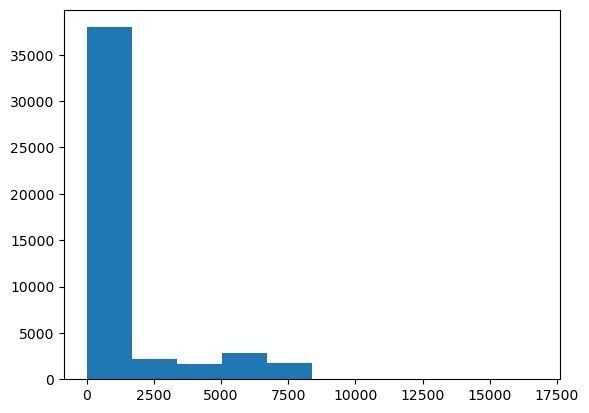

In [190]:
plt.hist(max_["Hours"])
plt.show()

In [210]:
incident

,CI Name (aff),CI Type (aff),CI Subtype (aff),Service Component WBS (aff),Incident ID,Status,Impact,Urgency,Priority,Category,...,# Related Interactions,Related Interaction,# Related Incidents,# Related Changes,Related Change,CI Name (CBy),CI Type (CBy),CI Subtype (CBy),ServiceComp WBS (CBy),Unnamed: 28
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4.0,4,4.0,incident,...,SD0000007,2,SUB000508,subapplication,Web Based Application,WBS000162,NaN,None,None,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3.0,3,3.0,incident,...,1,SD0000011,1,WBA000124,application,Web Based Application,WBS000088,NaN,None,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,3.0,3,3.0,request for information,...,SD0000017,DTA000024,application,Desktop Application,WBS000092,NaN,None,None,None,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4.0,4,4.0,incident,...,SD0000025,WBA000124,application,Web Based Application,WBS000088,NaN,None,None,None,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4.0,4,4.0,incident,...,SD0000029,SUB000508,subapplication,Web Based Application,WBS000162,NaN,None,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,...,None,None,None,None,None,None,None,None,None,NaN
46805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,...,None,None,None,None,None,None,None,None,None,NaN
46806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,...,None,None,None,None,None,None,None,None,None,NaN
46807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,...,None,None,None,None,None,None,None,None,None,NaN


**Changes**

Если определенные сбои в обслуживании повторяются чаще, чем обычно, начинается расследование проблемы, которое приведет к анализу и плану улучшений, чтобы предотвратить повторение сбоев в обслуживании.
План улучшения приводит к запросу на изменение (RfC).
Все CI связаны с сервисным компонентом, анализ влияния рисков выполняется менеджером по внедрению, назначенным для изменений, связанных с конкретным сервисным компонентом.

In [231]:
change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30275 entries, 0 to 30274
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CI Name (aff)                30275 non-null  object 
 1   CI Type (aff)                30275 non-null  object 
 2   CI Subtype (aff)             30275 non-null  object 
 3   Service Component WBS (aff)  30275 non-null  object 
 4   Change ID                    30275 non-null  object 
 5   Change Type                  30275 non-null  object 
 6   Risk Assessment              30275 non-null  object 
 7   Emergency Change             30275 non-null  object 
 8   CAB-approval needed          30275 non-null  object 
 9   Planned Start                30275 non-null  object 
 10  Planned End                  30275 non-null  object 
 11  Scheduled Downtime Start     30275 non-null  object 
 12  Scheduled Downtime End       30275 non-null  object 
 13  Actual Start    

In [240]:
change

,CI Name (aff),CI Type (aff),CI Subtype (aff),Service Component WBS (aff),Change ID,Change Type,Risk Assessment,Emergency Change,CAB-approval needed,Planned Start,...,Scheduled Downtime Start,Scheduled Downtime End,Actual Start,Actual End,Requested End Date,Change record Open Time,Change record Close Time,Originated from,# Related Interactions,# Related Incidents
0,HMD000002,hardware,MigratieDummy,WBS000195,C00000003,Release Type 11,Minor Change,N,N,30-8-2012 7:00,...,18-12-2013 14:00,18-12-2013 16:15,1-6-2012 0:00,1-9-2011 9:13,18-12-2013 16:16,Problem,NaN,None,NaN,NaN
1,SUB000494,subapplication,Web Based Application,WBS000162,C00000005,Release Type 13,Business Change,N,Y,4-3-2014 9:00,...,4-3-2014 17:52,4-3-2014 17:52,7-6-2012 12:00,6-10-2011 15:54,5-3-2014 7:03,Problem,NaN,None,NaN,NaN
2,OVR000012,no type,no subtype,WBS000256,C00000006,Release Type 11,Minor Change,N,N,1-6-2011 7:00,...,17-4-2013 14:00,13-12-2013 17:00,31-3-2012 17:00,7-10-2011 10:06,30-12-2013 9:40,Problem,NaN,None,NaN,NaN
3,ASW000010,software,Automation Software,WBS000284,C00000007,Standard Change Type 93,Minor Change,N,N,21-6-2013 9:00,...,2-9-2013 18:00,14-11-2011 17:17,10-10-2013 10:16,Problem,NaN,None,None,None,NaN,NaN
4,ASW000010,software,Automation Software,WBS000284,C00000008,Standard Change Type 93,Minor Change,N,N,21-10-2013 9:00,...,24-10-2013 0:00,25-10-2013 23:00,8-11-2013 18:00,30-11-2011 14:59,27-10-2013 14:52,Problem,NaN,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30270,LSR000161,computer,Linux Server,WBS000161,C00018598,Standard Change Type 81,Minor Change,N,N,31-3-2014 14:50,...,31-3-2014 14:50,31-3-2014 14:51,7-4-2014 14:41,31-3-2014 14:50,31-3-2014 14:51,Problem,NaN,None,NaN,NaN
30271,LSR000590,computer,Linux Server,WBS000161,C00018599,Standard Activity Type 19,Minor Change,N,N,31-3-2014 16:47,...,31-3-2014 18:05,31-3-2014 18:06,7-4-2014 16:40,31-3-2014 16:40,31-3-2014 18:06,Incident,NaN,None,NaN,NaN
30272,WSR000366,computer,Windows Server,WBS000102,C00018600,Standard Activity Type 47,Minor Change,N,N,31-3-2014 15:38,...,31-3-2014 15:54,31-3-2014 15:54,1-4-2014 18:00,31-3-2014 15:46,31-3-2014 15:58,Incident,NaN,None,NaN,NaN
30273,UIX000295,computer,Unix Server,WBS000206,C00018601,Standard Change Type 138,Minor Change,N,N,31-3-2014 16:12,...,31-3-2014 16:13,31-3-2014 16:13,2-4-2014 0:00,31-3-2014 16:07,31-3-2014 16:14,Problem,NaN,None,NaN,NaN


In [242]:
# разница между запрашивыемым временем и реальным
f = '%d-%m-%Y %H:%M:%S'
change["Requested End Date"] = pd.to_datetime(change["Requested End Date"], format=f)
change["Actual End"] = pd.to_datetime(change["Actual End"])
change["Actual Start"] = pd.to_datetime(change["Actual Start"])

ValueError: time data 18-12-2013 16:16 doesn't match format specified

In [226]:
change["Risk Assessment"].value_counts()

Minor Change             28445
Business Change           1717
Major Business Change      113
Name: Risk Assessment, dtype: int64

In [235]:
change["Emergency Change"].value_counts()

N    30185
Y       90
Name: Emergency Change, dtype: int64

In [237]:
emergency = change[change["Emergency Change"] == "Y"]

In [238]:
emergency["Actual Start"]

,CI Name (aff),CI Type (aff),CI Subtype (aff),Service Component WBS (aff),Change ID,Change Type,Risk Assessment,Emergency Change,CAB-approval needed,Planned Start,...,Scheduled Downtime Start,Scheduled Downtime End,Actual Start,Actual End,Requested End Date,Change record Open Time,Change record Close Time,Originated from,# Related Interactions,# Related Incidents
873,RTR000018,networkcomponents,Router,WBS000254,C00000543,Release Type 09,Business Change,Y,Y,13-7-2013 23:00,...,14-7-2013 0:20,14-7-2013 0:40,14-7-2013 0:00,14-7-2013 7:59,14-7-2013 8:00,9-7-2013 11:02,29-11-2013 23:38,Incident,40.0,NaN
874,NET000437,networkcomponents,Network Component,WBS000254,C00000543,Release Type 09,Business Change,Y,Y,13-7-2013 23:00,...,14-7-2013 0:20,14-7-2013 0:40,14-7-2013 0:00,14-7-2013 7:59,14-7-2013 8:00,9-7-2013 11:02,29-11-2013 23:38,Incident,40.0,NaN
875,SWT000032,networkcomponents,Switch,WBS000254,C00000543,Release Type 09,Business Change,Y,Y,13-7-2013 23:00,...,14-7-2013 0:20,14-7-2013 0:40,14-7-2013 0:00,14-7-2013 7:59,14-7-2013 8:00,9-7-2013 11:02,29-11-2013 23:38,Incident,40.0,NaN
876,SWT000033,networkcomponents,Switch,WBS000254,C00000543,Release Type 09,Business Change,Y,Y,13-7-2013 23:00,...,14-7-2013 0:20,14-7-2013 0:40,14-7-2013 0:00,14-7-2013 7:59,14-7-2013 8:00,9-7-2013 11:02,29-11-2013 23:38,Incident,40.0,NaN
877,SWT000073,networkcomponents,Switch,WBS000254,C00000543,Release Type 09,Business Change,Y,Y,13-7-2013 23:00,...,14-7-2013 0:20,14-7-2013 0:40,14-7-2013 0:00,14-7-2013 7:59,14-7-2013 8:00,9-7-2013 11:02,29-11-2013 23:38,Incident,40.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26380,SBA000523,application,Server Based Application,WBS000236,C00015939,Standard Change Type 13,Business Change,Y,N,28-2-2014 15:00,...,28-2-2014 19:30,28-2-2014 21:15,28-2-2014 16:00,28-2-2014 9:57,27-3-2014 12:25,Problem,NaN,None,NaN,NaN
26381,SBA000526,application,Server Based Application,WBS000236,C00015939,Standard Change Type 13,Business Change,Y,N,28-2-2014 15:00,...,28-2-2014 19:30,28-2-2014 21:15,28-2-2014 16:00,28-2-2014 9:57,27-3-2014 12:25,Problem,NaN,None,NaN,NaN
28479,SBA000523,application,Server Based Application,WBS000236,C00017301,Standard Change Type 13,Business Change,Y,N,18-3-2014 15:00,...,18-3-2014 15:00,18-3-2014 16:34,18-3-2014 18:00,17-3-2014 9:43,27-3-2014 12:26,Problem,NaN,None,NaN,NaN
28480,SBA000526,application,Server Based Application,WBS000236,C00017301,Standard Change Type 13,Business Change,Y,N,18-3-2014 15:00,...,18-3-2014 15:00,18-3-2014 16:34,18-3-2014 18:00,17-3-2014 9:43,27-3-2014 12:26,Problem,NaN,None,NaN,NaN


In [227]:
change[change["Risk Assessment"] == "Major Business Change"]

,CI Name (aff),CI Type (aff),CI Subtype (aff),Service Component WBS (aff),Change ID,Change Type,Risk Assessment,Emergency Change,CAB-approval needed,Planned Start,...,Scheduled Downtime Start,Scheduled Downtime End,Actual Start,Actual End,Requested End Date,Change record Open Time,Change record Close Time,Originated from,# Related Interactions,# Related Incidents
72,WBA000133,application,Web Based Application,WBS000073,C00000050,Release Type 13,Major Business Change,N,Y,17-11-2013 0:00,...,17-11-2013 0:00,17-11-2013 7:00,17-11-2013 14:39,17-11-2013 14:39,18-11-2013 7:00,17-9-2012 11:18,19-12-2013 11:02,Incident,11.0,NaN
180,WBA000133,application,Web Based Application,WBS000073,C00000118,Release Type 13,Major Business Change,N,Y,22-9-2013 0:00,...,22-9-2013 0:00,22-9-2013 7:00,22-9-2013 15:37,22-9-2013 15:37,22-9-2013 7:00,15-1-2013 10:11,8-10-2013 9:20,Problem,NaN,NaN
181,SUB000419,subapplication,Siebel,WBS000073,C00000118,Release Type 13,Major Business Change,N,Y,22-9-2013 0:00,...,22-9-2013 0:00,22-9-2013 7:00,22-9-2013 15:37,22-9-2013 15:37,22-9-2013 7:00,15-1-2013 10:11,8-10-2013 9:20,Problem,NaN,NaN
182,SBA000184,application,Server Based Application,WBS000157,C00000119,Release Type 13,Major Business Change,N,Y,22-9-2013 0:00,...,22-9-2013 0:00,22-9-2013 7:00,22-9-2013 15:44,22-9-2013 15:44,22-9-2013 7:00,15-1-2013 11:16,1-10-2013 14:38,Problem,NaN,NaN
183,SBA000184,application,Server Based Application,WBS000157,C00000120,Release Type 13,Major Business Change,N,Y,22-9-2013 0:00,...,22-9-2013 0:00,22-9-2013 7:00,22-9-2013 15:52,22-9-2013 15:52,22-9-2013 7:00,15-1-2013 11:18,1-10-2013 14:38,Incident,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25657,SWT000236,networkcomponents,Switch,WBS000283,C00015505,Release Type 08,Major Business Change,N,Y,30-3-2014 0:00,...,24-2-2014 16:53,25-2-2014 15:43,Problem,NaN,None,None,None,None,NaN,NaN
25658,SWT000237,networkcomponents,Switch,WBS000283,C00015505,Release Type 08,Major Business Change,N,Y,30-3-2014 0:00,...,24-2-2014 16:53,25-2-2014 15:43,Problem,NaN,None,None,None,None,NaN,NaN
25659,SWT000238,networkcomponents,Switch,WBS000283,C00015505,Release Type 08,Major Business Change,N,Y,30-3-2014 0:00,...,24-2-2014 16:53,25-2-2014 15:43,Problem,NaN,None,None,None,None,NaN,NaN
25660,SWT000263,networkcomponents,Switch,WBS000254,C00015505,Release Type 08,Major Business Change,N,Y,30-3-2014 0:00,...,24-2-2014 16:53,25-2-2014 15:43,Problem,NaN,None,None,None,None,NaN,NaN
